# Life Expectancy Project


## At this project i will show:
- How much countries have increased their GDP over the years
- What was life expectancy like during these intervening years?
- What will life expectancy be like in the years to come?
- How does GDP affect the life expectancy of people in each country?

### Source of data: World Health Organization and the World Bank

In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from scipy.stats import ttest_ind

df = pd.read_csv('all_data.csv')

print(df.head(), '\n')
print(df.dtypes, '\n')
print(df.Country.unique(), '\n')


# for value in df.Country[df['Life expectancy at birth (years)']]:


def average_life_expectancy(country):
    average_list = np.mean(df['Life expectancy at birth (years)'][df['Country'] == country]) 
    print('The {} Life Expectancy average is:'.format(country), round(average_list, 2))

average_life_expectancy('Chile')
average_life_expectancy('China')
average_life_expectancy('Germany')
average_life_expectancy('Mexico')
average_life_expectancy('United States of America')
average_life_expectancy('Zimbabwe')


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object 

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 

The Chile Life Expectancy average is: 78.94
The China Life Expectancy average is: 74.26
The Germany Life Expectancy average is: 79.66
The Mexico Life Expectancy average is: 75.72
The United States of America Life Expectancy average is: 78.06
The Zimbabwe Life Expectancy average is: 50.09


['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


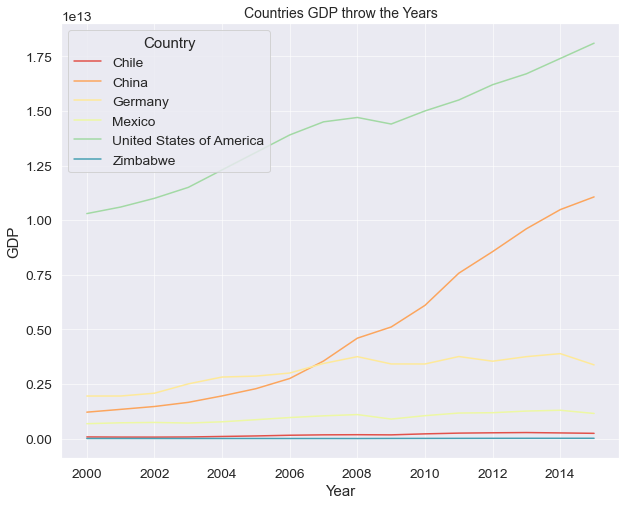

<Figure size 432x288 with 0 Axes>

In [74]:
#ploting a line graph to compare the GFP grow up throw the countries
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x=df.Year, y=df.GDP, hue=df.Country)
sns.set_palette('colorblind')
sns.set_style('dark')

plt.title('Countries GDP throw the Years', fontsize=14)
sns.move_legend(ax, loc='upper left')

plt.show()
plt.clf()



### With this line plot we can see that the countries who have the most GDP upside are: EUA and China

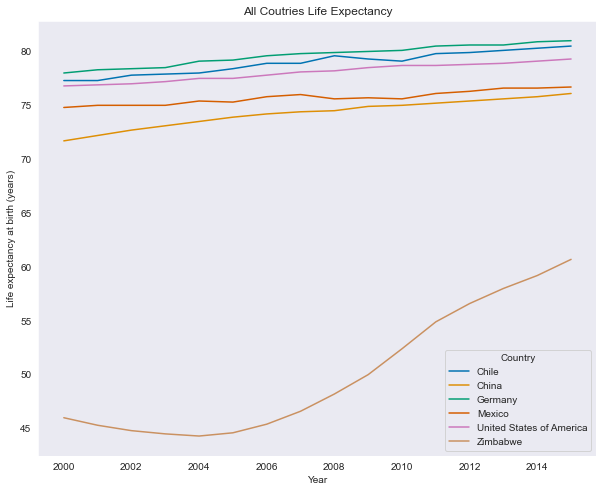

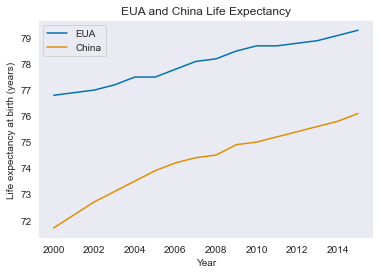

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x=df.Year, y=df['Life expectancy at birth (years)'], hue=df.Country)
plt.title('All Coutries Life Expectancy')
plt.show()
plt.clf()

#lets see the distribution of life expectancy of EUA and China
eua_df = df[df.Country == 'United States of America']
china_df = df[df.Country == 'China']

sns.lineplot(data=eua_df, x=eua_df.Year, y=eua_df['Life expectancy at birth (years)'])
sns.lineplot(data=china_df, x=china_df.Year, y=china_df['Life expectancy at birth (years)'])
plt.title('EUA and China Life Expectancy')
plt.legend(['EUA', 'China'])
plt.show()
plt.clf()

### As we imagine the US and China have had a big increase in life expectancy, but Zimbabwe has also had

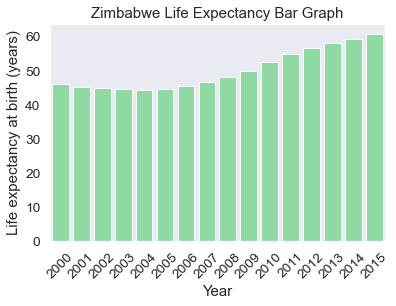

<Figure size 432x288 with 0 Axes>

In [91]:
zimb_df = df[df.Country == 'Zimbabwe']
# print(zimb_df)

sns.barplot(x = "Year", y = "Life expectancy at birth (years)", data = zimb_df, color='#83e69d')
plt.xticks(rotation=45)
plt.title('Zimbabwe Life Expectancy Bar Graph')
plt.show()
plt.clf()


### after that discover i decide to make an hipothesys test to see if life expectancy have relationship with gdp

In [ ]:
#null: have a relationship btw GDP and life expectancy
#alternative: dont have a relationship

tstat, pval = ttest_ind(df['Life expectancy at birth (years)'], df.GDP)
print('The p-value is:', pval)

The p-value is: 7.007737118375318e-12


### Using a significance threshold of 0.05 we can conclude that we have a relationship btw GDP and life expectancy

### We can conclude with the hypothesis tests that GDP has an influence on life expectancy but there may be other things that also have an influence, something like medical specialization, I can guess